<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


# Import Libraries

In [1]:
# Libraries needed in order of appearance:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Dataset 

## About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


## Download the dataset

Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-21 18:26:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 33,2M=0,001s

2022-06-21 18:26:16 (33,2 MB/s) - 'loan_train.csv' saved [23101/23101]



## Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Time variables

First we convert the effective_date and due_date variables to datetime.


In [5]:
# Convert the date tu datetime

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

# Get the day of the week for the effective and due dates

df['effective_dayofweek'] = df['effective_date'].dt.dayofweek
df['due_dayofweek'] = df['due_date'].dt.dayofweek

df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


## Data visualization


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



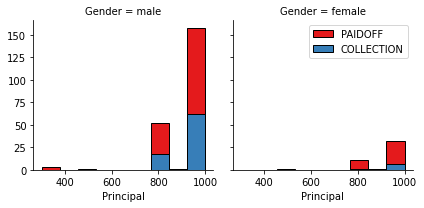

In [8]:
# Plot the histogram of the loan status per gender and amount

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

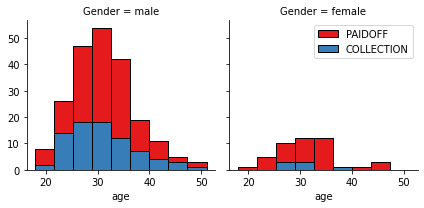

In [9]:
# Plot the histogram of the loan status per gender and age

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Let's look at the day of the week people get the loan


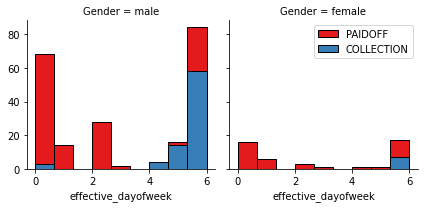

In [10]:
# Plot the histogram of the loan status per gender and effective day of the week

bins = np.linspace(df.effective_dayofweek.min(), df.effective_dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'effective_dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

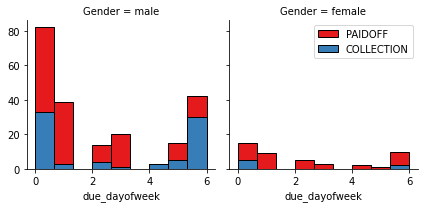

In [11]:
# Plot the histogram of the loan status per gender and due date of the week

bins = np.linspace(df.due_dayofweek.min(), df.due_dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'due_dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

# Pre-processing

## Time dependant variables

We saw that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4, and create a new binary varible called 'weekend'.

In [12]:
# Create a weekend variable

df['effective_weekend'] = df['effective_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

We create another numerical variable with the days between the effective_date and the due_date, to get another point of view.

In [13]:
# Create a variable for the number of days between the due date and the effective date

df['time_interval'] = (df['due_date'] - df['effective_date']).dt.days
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek,effective_weekend,time_interval
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,29


## Convert Categorical features to numerical values

There are two typical ways to do this:

- **One Hot Encoder**: this converts our categorical variable with n different values into n dummy variables (0 if they are not into the variable category or 1 if they do). 
One-Hot Encoding can lead to Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables, a scenario in which variables are highly correlated to each other: multicollinearity. This occurs where there is a dependency between the independent features. It's is a serious issue in models like Linear Regression and Logistic Regression.
In order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.
One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):
    * VIF=1, Very Less Multicollinearity
    * VIF<5, Moderate Multicollinearity
    * VIF>5, Extreme Multicollinearity (Avoid)


- **Label Encoder**: this converts our categorical variable to a numerical one where each one of the n values from the original gets a numerical value from 0 to n-1 (ordered alphabetically).

**When do we use each of them?**
- **One Hot Encoder**: The categorical variable is not ordinal (countries, gender...). Also if the number of categorical features is small.
- **Label Encoder**: Useful if the variables we are replacing have an order, i.e. if the feature is ordinal (Junior and Senior, primary school and high school...). Also if the number of categories is quite large as it consumes less memory.

### Gender

Let's look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'] = df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek,effective_weekend,time_interval
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,4,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,4,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,3,0,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,5,1,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,5,1,29


### Education

How about education? Let's asume it has an order, depending on the level of studies of each person, so let's apply the label encoder. As it follows an alphabetical order, we will use instead the replace option that will lead to the same result, but we will get an ascending number when talking about hoigher level of studies, which seems right.

In [16]:
# We print the unique values posssible in education

df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [17]:
df['education'] = df['education'].replace(to_replace=['High School or Below', 'Bechalor', 'college', 'Master or Above'], value=[0,1,2,3],inplace=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek,effective_weekend,time_interval
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,3,4,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,3,4,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,0,3,3,0,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,1,4,5,1,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,0,4,5,1,29


In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education  loan_status
0          PAIDOFF        0.741722
           COLLECTION     0.258278
1          PAIDOFF        0.750000
           COLLECTION     0.250000
2          PAIDOFF        0.765101
           COLLECTION     0.234899
3          COLLECTION     0.500000
           PAIDOFF        0.500000
Name: loan_status, dtype: float64

# Train test split

## Feature Selection

On each model we will select the features we want to use as follows:

In [19]:
Feature = df[df.columns] # If we want all of the variables
Feature.drop(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status','effective_date','due_date'], axis=1, inplace=True)
Feature.columns

Index(['Principal', 'terms', 'age', 'education', 'Gender',
       'effective_dayofweek', 'due_dayofweek', 'effective_weekend',
       'time_interval'],
      dtype='object')

Let's define feature sets, X:


In [20]:
X = Feature
X[0:5]

,Principal,terms,age,education,Gender,effective_dayofweek,due_dayofweek,effective_weekend,time_interval
0,1000,30,45,0,0,3,4,0,29
1,1000,30,33,1,1,3,4,0,29
2,1000,15,27,2,0,3,3,0,14
3,1000,30,28,2,1,4,5,1,29
4,1000,30,29,2,0,4,5,1,29


What are our lables?


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Train test split

As seen in the course: 

"Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems."

In [22]:
# Split the non-normalized train set into train and test subsets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


# Normalization


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [23]:
# We fit the scaler with the train set, and transform both train and test set with it

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[0:2]

array([[ 0.56081126, -0.9677917 ,  0.69858179,  1.11207464, -0.40565621,
        -1.38869051, -0.96078114, -1.17444044, -0.87391174],
       [ 0.56081126,  0.9437816 , -0.81959596, -1.03430718, -0.40565621,
         0.91558954, -0.96078114,  0.85146932,  0.5393674 ]])

In [24]:
X_test = scaler.transform(X_test)
X_test[0:2]

array([[ 0.56081126,  0.9437816 , -0.14485029, -1.03430718, -0.40565621,
         0.91558954, -0.96078114,  0.85146932,  0.5393674 ],
       [-1.23900162, -0.9677917 , -0.14485029,  1.11207464, -0.40565621,
         0.91558954,  1.44990608,  0.85146932, -0.87391174]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.

### Finding the best K

As seen in the course:

"In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the **jaccard_score** function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set."

"K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, **how can we choose right value for K?**
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k=1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k."

In [25]:
# Calculate the accuracy for knn with k from 1 to 50

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72857143, 0.64285714, 0.74285714, 0.72857143, 0.74285714,
       0.71428571, 0.7       , 0.65714286, 0.67142857, 0.62857143,
       0.68571429, 0.62857143, 0.68571429, 0.64285714, 0.67142857,
       0.64285714, 0.67142857, 0.65714286, 0.71428571, 0.67142857,
       0.7       , 0.7       , 0.71428571, 0.68571429, 0.72857143,
       0.71428571, 0.77142857, 0.75714286, 0.78571429, 0.8       ,
       0.78571429, 0.74285714, 0.78571429, 0.75714286, 0.77142857,
       0.78571429, 0.78571429, 0.77142857, 0.77142857, 0.77142857,
       0.77142857, 0.78571429, 0.78571429, 0.78571429, 0.77142857,
       0.74285714, 0.77142857, 0.74285714, 0.74285714])

#### Plotting the model accuracy

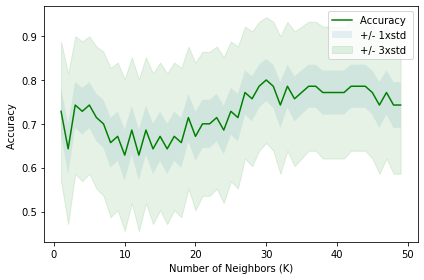

In [26]:
# Plot the accuracy for k=1 to 50

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 30


### Train, predict, and evaluate for the best k

In [28]:
# Train the knn model for the best k

k = mean_acc.argmax()+1 # Best k

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [29]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7644927536231884
Test set Accuracy:  0.8


We can see here that our model for the best k actually has higher accuracy for the test set than for the train set, which means that it can generalize to external data, which is good.

Also, we get an accuracy of 0.8, which is good but not that much as it leaves a considerable margin for errors.

## Decision Tree

### Selecting the optimum depth

In [30]:
# Calculate the accuracy for the decision tree with depths from 1 to 30

depths = 30
tree_mean_acc = np.zeros((depths-1))
tree_std_acc = np.zeros((depths-1))
for depth in range(1,depths):
    statusTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    statusTree.fit(X_train,y_train)
    predTree = statusTree.predict(X_test)
    tree_mean_acc[depth-1] = metrics.accuracy_score(y_test, predTree)
    tree_std_acc[depth-1]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

tree_mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.67142857, 0.68571429,
       0.7       , 0.68571429, 0.77142857, 0.68571429, 0.77142857,
       0.77142857, 0.75714286, 0.75714286, 0.77142857, 0.77142857,
       0.75714286, 0.77142857, 0.75714286, 0.75714286, 0.77142857,
       0.77142857, 0.75714286, 0.75714286, 0.75714286, 0.75714286,
       0.75714286, 0.75714286, 0.75714286, 0.77142857])

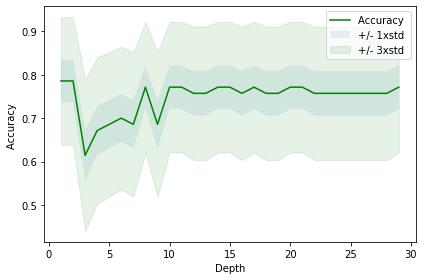

In [31]:
# Plot the accuracy for depth=1 to 50

plt.plot(range(1,depths),tree_mean_acc,'g')
plt.fill_between(range(1,depths),tree_mean_acc - 1 * tree_std_acc,tree_mean_acc + 1 * tree_std_acc, alpha=0.10)
plt.fill_between(range(1,depths),tree_mean_acc - 3 * tree_std_acc,tree_mean_acc + 3 * tree_std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", tree_mean_acc.max(), "with depth =", tree_mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with depth = 1


### Train, predict, and evaluate for the best depth

We will first create an instance of the **DecisionTreeClassifier** called **statusTree**.
We specify criterion="entropy" so we can see the information gain of each node.

In [33]:
# Train the decision tree model for the best depth

statusTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_mean_acc.argmax()+1) # criterion : {"gini", "entropy", "log_loss"}
statusTree.fit(X_train,y_train)
predTree = statusTree.predict(X_test)

In [34]:
# We can print out the predictions vs the test set

print (predTree [0:5])
print (y_test [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [35]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, statusTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857


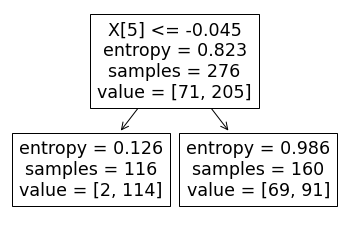

In [36]:
tree.plot_tree(statusTree)
plt.show()

In [37]:
Feature.columns

Index(['Principal', 'terms', 'age', 'education', 'Gender',
       'effective_dayofweek', 'due_dayofweek', 'effective_weekend',
       'time_interval'],
      dtype='object')

## Support Vector Machine


As seen in the course:

"The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results."

**About the metrics:**

Accuracy is used when the true positives and negatives are more important, while F1-score is used when the false positives and negatives are crucial.
Accuracy can be used when the class distribution is similar, while F1-score is a better metric when there are imbalanced classes.

### Selecting the best kernel function

In [38]:
# Calculate the accuracy for the different kernel functions

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_mean_acc = np.zeros((len(kernels)))
svm_std_acc = np.zeros((len(kernels)))
for kernel in range(len(kernels)):
    clf = svm.SVC(kernel = kernels[kernel])
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    svm_mean_acc[kernel] = metrics.accuracy_score(y_test, yhat)
    svm_mean_acc[kernel] = f1_score(y_test, yhat, average='weighted')
    svm_std_acc[kernel]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

svm_mean_acc

array([0.70647931, 0.73342447, 0.68067227, 0.69538674])

In [39]:
print( "The best F1 score was with", svm_mean_acc.max(), "with kernel function = ", kernels[svm_mean_acc.argmax()])

The best F1 score was with 0.7334244702665754 with kernel function =  poly


### Train, predict, and evaluate for the best kernel function

In [40]:
# Train the svm model for the best kernel function

clf = svm.SVC(kernel=kernels[svm_mean_acc.argmax()])
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.50      0.13      0.21        15
     PAIDOFF       0.80      0.96      0.88        55

    accuracy                           0.79        70
   macro avg       0.65      0.55      0.54        70
weighted avg       0.74      0.79      0.73        70

Confusion matrix, without normalization
[[53  2]
 [13  2]]


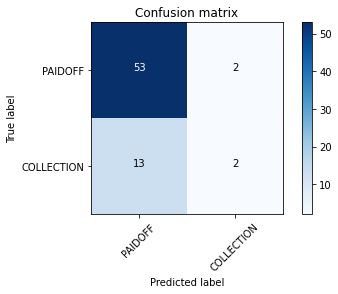

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [43]:
f1_score(y_test, yhat, average='weighted') 

0.7334244702665754

In [44]:
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.7794117647058824

## Logistic Regression


Let's build our **LogisticRegression** from the Scikit-learn package. 

As seen in the course: 

"This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization."

### Selecting the best optimizer solver and c

In [45]:
# Calculate the accuracy for the logistic regression with different optimizer solvers and c

optimizers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
lr_mean_acc = np.zeros((len(optimizers)))
lr_std_acc = np.zeros((len(optimizers)))

lr_mean_acc = [[],[]]
lr_std_acc = []

for opt in range(len(optimizers)):

    lr_c_mean_acc = []

    for c in np.arange(0.01,0.3,0.01):

        LR = LogisticRegression(C = c, solver = optimizers[opt]).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)

        lr_c_mean_acc.append(f1_score(y_test, yhat, average='weighted'))

    lr_mean_acc[1].append(lr_c_mean_acc[1].max()) # gives value
    lr_mean_acc[0].append((0.01+(np.array(lr_c_mean_acc).argmax())*0.01).round(2)) # gives the c

lr_mean_acc

[[0.02, 0.02, 0.07, 0.02, 0.02],
 [0.7237903225806451,
  0.7237903225806451,
  0.6479591836734695,
  0.7237903225806451,
  0.7237903225806451]]

In [46]:
print( "The best F1 score was with", np.array(lr_mean_acc[1]).max(), "with optimizer solver = ", optimizers[np.array(lr_mean_acc[1]).argmax()], 'with c = ', lr_mean_acc[0][np.array(lr_mean_acc[1]).argmax()])

The best F1 score was with 0.7237903225806451 with optimizer solver =  newton-cg with c =  0.02


### Train, predict, and evaluate for the best optimizer solver and c

In [47]:
# Train the logistic regression model for the best optimizer solver and c

LR = LogisticRegression(C=lr_mean_acc[0][np.array(lr_mean_acc[1]).argmax()], solver=optimizers[np.array(lr_mean_acc[1]).argmax()]).fit(X_train,y_train)
yhat = LR.predict(X_test)

As seen in the course: 

"**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
"

In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.4 , 0.6 ],
       [0.35, 0.65],
       [0.08, 0.92],
       [0.12, 0.88],
       [0.1 , 0.9 ]])

Let's try the **jaccard index** for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [49]:
jaccard_score(y_test, yhat,pos_label='PAIDOFF')

0.7971014492753623

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION']))

[[55  0]
 [14  1]]


In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[55  0]
 [14  1]]


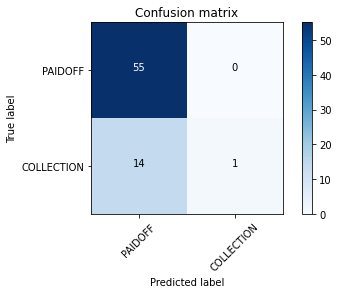

In [52]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [53]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.12        15
     PAIDOFF       0.80      1.00      0.89        55

    accuracy                           0.80        70
   macro avg       0.90      0.53      0.51        70
weighted avg       0.84      0.80      0.72        70



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47537638205738425

# Model Evaluation using Test set


## Download the test set

First, download and load the test set:


In [55]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-21 18:27:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3,6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 1,47G=0s

2022-06-21 18:27:04 (1,47 GB/s) - 'loan_test.csv' saved [3642/3642]



## Load test set for evaluation


In [56]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


We create some functions for the preprocessing and them we apply them to our testing set.

In [57]:
# Create the preprocessing pipeline for the test set

def pre(df):
    df['due_date'] = pd.to_datetime(df['due_date'])
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['effective_dayofweek'] = df['effective_date'].dt.dayofweek
    df['due_dayofweek'] = df['due_date'].dt.dayofweek
    df['effective_weekend'] = df['effective_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    df['time_interval'] = (df['due_date'] - df['effective_date']).dt.days
    df['Gender'] = df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=False)
    df['education'] = df['education'].replace(to_replace=['High School or Below', 'Bechalor', 'college', 'Master or Above'], value=[0,1,2,3],inplace=False)
    return df

def features(df):
    Feature = df[df.columns] # If we want all of the variables
    Feature.drop(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status','effective_date','due_date'], axis=1, inplace=True)
    X = Feature
    y = df['loan_status'].values
    return X, y

def normalization(X):
    X = scaler.transform(X)
    return X

In [58]:
test_df = pre(test_df)
X, y = features(test_df)
X = normalization(X)

## K Nearest Neighbor (KNN)

In [59]:
yhat = neigh.predict(X)
knn_jaccard = jaccard_score(y, yhat, pos_label='PAIDOFF')
knn_f1 = f1_score(y, yhat, average='weighted')
print("Jaccard score: ", knn_jaccard, " | ", "F1 score: ", knn_f1, " | ", "Accuracy: ", metrics.accuracy_score(y, yhat))

Jaccard score:  0.75  |  F1 score:  0.6959228135698723  |  Accuracy:  0.7592592592592593


## Decision Tree

In [60]:
predTree = statusTree.predict(X)
dt_jaccard = jaccard_score(y, predTree , pos_label='PAIDOFF')
dt_f1 = f1_score(y, predTree, average='weighted')
print("Jaccard score: ", dt_jaccard, " | ", "F1 score: ", dt_f1, " | ", "Accuracy: ", metrics.accuracy_score(y, predTree))

Jaccard score:  0.7407407407407407  |  F1 score:  0.6304176516942475  |  Accuracy:  0.7407407407407407


## Support Vector Machine

In [61]:
yhat = clf.predict(X)
svm_jaccard = jaccard_score(y, yhat, pos_label='PAIDOFF')
svm_f1 = f1_score(y, yhat, average='weighted')
print("Jaccard score: ", svm_jaccard, " | ", "F1 score: ", svm_f1, " | ", "Accuracy: ", metrics.accuracy_score(y, yhat))

Jaccard score:  0.7358490566037735  |  F1 score:  0.6604267310789049  |  Accuracy:  0.7407407407407407


## Logistic Regression

In [62]:
yhat = LR.predict(X)
yhat_prob = LR.predict_proba(X)
lr_jaccard = jaccard_score(y, yhat, pos_label='PAIDOFF')
lr_f1 = f1_score(y, yhat, average='weighted')
lr_log_loss = log_loss(y, yhat_prob)
print("Jaccard score: ", lr_jaccard, " | ", "F1 score: ", lr_f1, " | ", "Log-loss: ", lr_log_loss, " | ", "Accuracy: ", metrics.accuracy_score(y, yhat))

Jaccard score:  0.7407407407407407  |  F1 score:  0.6304176516942475  |  Log-loss:  0.4941866334990531  |  Accuracy:  0.7407407407407407


## Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [63]:
# We create a df with our recorded scores and print it

scores = [[knn_jaccard, knn_f1, "-"],
     [dt_jaccard, dt_f1, "-"],
     [svm_jaccard, svm_f1, "-"],
     [lr_jaccard, lr_f1, lr_log_loss]]

report = pd.DataFrame(scores, columns = ['Jaccard','F1 score','LogLoss'], index = ['KNN','DecisionTree','SVM','LogisticRegression'])
report

,Jaccard,F1 score,LogLoss
KNN,0.750000,0.695923,-
DecisionTree,0.740741,0.630418,-
SVM,0.735849,0.660427,-
LogisticRegression,0.740741,0.630418,0.494187


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
